# Bussiness Understanding

## Bussiness Problem

The e-commerce company has a diverse user base with varying behaviors across different stages of the shopping journey — from browsing products to completing purchases. However, not all users successfully reach the purchase stage, and not all buyers contribute equally to total revenue.

Without a deep understanding of user behavior and customer segmentation, the company struggles to:

* Identify where users are most likely to drop off during the conversion funnel,

* Understand which customers provide the highest value to the business, and

* Design effective marketing strategies to improve both conversion and retention rates.

## Objectives

1. Analyze user behavior at each stage of the purchase funnel (view → add to cart → checkout → purchase).

2. Identify the key drop-off points within the funnel to improve conversion rates.

3. Measure customer value based on Recency, Frequency, and Monetary (RFM) metrics.

4. Segment customers into groups to enable more targeted and effective marketing strategies based on RFM metrics.

5. Provide strategic insights to enhance both conversion efficiency and customer retention.

## Bussiness Questions

1. Funnel Analysis Questions

* How many users are present at each stage of the funnel (view → add_to_cart → checkout → purchase)?

* What are the conversion rates between each stage, and where does the largest drop-off occur?

2. RFM Analysis Questions

* How are customers segmented based on their RFM scores?

* Which customer segments contribute the most to total sales?

* What marketing strategies are suitable for each customer segment?

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import datetime as dt

# Data Understanding

In [2]:
#Read dataset
df_customer = pd.read_excel("/content/final_customer_data.xlsx")
df_customer.head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


| **Column Name** | **Description** |
|------------------|-----------------|
| **User_ID** | Unique identifier for each user. |
| **Session_ID** | Unique session identifier for tracking individual user sessions. |
| **DateTime** | Timestamp of the interaction. |
| **Category** | Product category being viewed or interacted with. |
| **SubCategory** | Detailed subcategory within the main product category. |
| **Action** | Type of user action (e.g., search, view product, add to cart, etc.). |
| **Quantity** | Number of items in a transaction (if applicable). |
| **Rate** | Price rate of the product (if applicable). |
| **Total Price** | Total transaction amount (if applicable). |


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_id      2090 non-null   int64  
 1   Session_id   2090 non-null   object 
 2   DateTime     2090 non-null   object 
 3   Category     2090 non-null   object 
 4   SubCategory  2090 non-null   object 
 5   Action       2090 non-null   object 
 6   Quantity     201 non-null    float64
 7   Rate         201 non-null    float64
 8   Total Price  201 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 147.1+ KB


**Interpretation**

1. Total Rows: 2090
2. Total Columns = 9
3. Numerical = `User_id`,`Quantity`, `Rate`, `Total Price`
4. Categorical = `Session_id`, `DateTime`, `Category`, `SubCategory`, `Action`

# Data Cleaning

## 1. Changing Data Types

In [4]:
# Changing User_id to Object because User_id means identifier
df_customer['User_id'] = df_customer['User_id'].astype(str)

In [5]:
# Changing DateTime to DateTime
df_customer['DateTime'] = pd.to_datetime(df_customer['DateTime'])

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      2090 non-null   object        
 1   Session_id   2090 non-null   object        
 2   DateTime     2090 non-null   datetime64[ns]
 3   Category     2090 non-null   object        
 4   SubCategory  2090 non-null   object        
 5   Action       2090 non-null   object        
 6   Quantity     201 non-null    float64       
 7   Rate         201 non-null    float64       
 8   Total Price  201 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 147.1+ KB


**Interpretations**

After changing data types, the `User_id` column has become a string (object) and the `DateTime` column has become a DateTime format.

In [7]:
df_customer['DateTime'].value_counts().sort_values(ascending=False)

,count
DateTime,
2019-08-16 21:19:00,8
2019-02-11 14:59:00,4
2019-02-11 15:19:00,4
2019-01-11 10:38:00,4
2019-02-11 14:49:00,3
...,...
2019-01-10 19:17:00,1
2019-01-10 22:12:00,1
2019-01-10 22:14:00,1


## 2. Checking Duplicate Data

In [8]:
len(df_customer.drop_duplicates())/len(df_customer)

1.0

**Intrepretation**

The result is 1 means that no duplicate data in the dataset

## 3. Missing Value Handling

### Isna and Isnull Method

In [9]:
#Checking using isna
df_customer.isna().sum()

,0
User_id,0
Session_id,0
DateTime,0
Category,0
SubCategory,0
Action,0
Quantity,1889
Rate,1889
Total Price,1889


In [10]:
#Checking using isnull
df_customer.isnull().sum()

,0
User_id,0
Session_id,0
DateTime,0
Category,0
SubCategory,0
Action,0
Quantity,1889
Rate,1889
Total Price,1889


The Quantity, Rate, and Total Price columns contain many NaN values in the customer behavior dataset because only certain types of actions (e.g., purchase) have values in the Quantity, Rate, and Total Price columns. Other actions such as search, view, or read_reviews do not result in direct transactions, so they do not have quantity or price values.

For the funnel analysis process, we will only use the main columns, namely User ID, DateTime, and Action. Therefore, for the funnel analysis for the Quantity, Rate, and Total Price columns, we will ignore the NaN values. Based on checks using the Isna and Isnull methods, there are no NaN values for the User ID, DateTime, and Action columns.

### Value_counts Method

In [11]:
exclude_cols = ['Quantity', 'Rate', 'Total Price']

for column in df_customer.columns:
    if column not in exclude_cols:
        print(f"============= {column} =================")
        display(df_customer[column].value_counts())
        print()

============= User_id =================


,count
User_id,
51969791374,25
51565158157,24
51725305614,23
51526464449,22
58113870922,20
...,...
51982480153,1
52308484453,1
51791819800,1



============= Session_id =================


,count
Session_id,
94df-a04f-4051-8f18-4c,4
997fbe-d5a8-475e-a662-,3
f90313-5572-4894-a4eb-45d,3
068c2ea6-6b4e-4078-8cdf,3
d28ecbc7-ee22-41a5-8dd2,2
...,...
a7da5659-fbb2-925c-03ea,1
ba31f6de-daa2-def2-a02e,1
bf9b58c6-a1af-4e93-8153,1



============= DateTime =================


,count
DateTime,
2019-08-16 21:19:00,8
2019-02-11 14:59:00,4
2019-02-11 15:19:00,4
2019-01-11 10:38:00,4
2019-02-11 15:00:00,3
...,...
2019-06-18 11:17:00,1
2019-06-18 11:14:00,1
2019-06-15 16:19:00,1



============= Category =================


,count
Category,
Mobile & Accessories,139
Women's Fashion,113
Digital Devices,101
Accessories,91
Men's Fashion,88
...,...
Kids,3
Utilities,2
Movies,2



============= SubCategory =================


,count
SubCategory,
Books,46
Watches,36
Jeans,32
Speakers,29
Tops,27
...,...
Lens cleaner,1
Drone,1
Umberla,1



============= Action =================


,count
Action,
read_reviews,342
search,320
product_view,292
add_to_cart,280
checkout,202
click_wishlist_page,202
purchase,201
first_app_open,121
add_review,69


**Interpretation**

By Checking one by one, there is no missing value in each column

## 4. Prepare Dataset for Funnel Analysis

In [12]:
#Prepare Dataset for funnel analysis
funnel_cols = ['User_id','Action']
df_funnel = df_customer[funnel_cols].copy()
df_funnel.head()

,User_id,Action
0,52243841613,first_app_open
1,52243841613,search
2,57314161118,search
3,57314161118,product_view
4,57314161118,read_reviews


In [13]:
#Prepare Dataset for RFM Analysis
rfm_cols = ['User_id', 'DateTime', 'Total Price', 'Quantity', 'Rate', 'Category','SubCategory']
df_rfm = df_customer[rfm_cols].copy()
df_rfm.head()

,User_id,DateTime,Total Price,Quantity,Rate,Category,SubCategory
0,52243841613,2019-01-10 10:20:00,NaN,NaN,NaN,Electronic Appliances,Speakers
1,52243841613,2019-01-10 10:22:00,NaN,NaN,NaN,Electronic Appliances,Speakers
2,57314161118,2019-01-10 14:00:00,NaN,NaN,NaN,Men's Fashion,Jeans
3,57314161118,2019-01-10 14:07:00,NaN,NaN,NaN,Men's Fashion,Jeans
4,57314161118,2019-01-10 14:12:00,NaN,NaN,NaN,Men's Fashion,Jeans


In [14]:
#Filter only rows with the ‘purchase’ action
# For clarity, consistency, and measurable business insight, the rfm analysis only includes users and events leading up to the “purchase” action.
#This approach ensures that the funnel reflects true conversion behavior and provides reliable insights for improving marketing and sales performance.
if 'Action' in df_customer.columns:
    df_rfm = df_customer[df_customer['Action'] == 'purchase'][rfm_cols]

In [15]:
df_rfm.head()

,User_id,DateTime,Total Price,Quantity,Rate,Category,SubCategory
13,51629142904,2019-09-03 18:10:00,1500.0,5.0,300.0,Cleaning supplies,Cleaning sprays
21,51629142904,2019-01-10 21:08:00,4000.0,2.0,2000.0,Mobile & Accessories,Charging wire
42,51940324591,2019-04-08 19:09:00,500.0,5.0,100.0,Mobile & Accessories,Cases
55,51965507652,2019-12-10 19:25:00,4000.0,4.0,1000.0,Digital Devices,Headphones
67,51940324591,2019-12-10 13:07:00,2000.0,2.0,1000.0,Fitness,Dumbells


* Why the Funnel Analysis Focuses Only on Purchase Actions

In this analysis, the funnel is constructed using user interactions that represent clear stages in the online shopping journey — from viewing a product to completing a purchase.
However, for the purpose of evaluating conversion performance, the final stage of the funnel is limited to the “purchase” action.

**Reasoning:**

1. Represents Actual Conversions

* The purchase event is the only action that directly reflects a completed transaction and real revenue generation.

* Other actions such as add_to_cart, checkout, or review indicate interest or engagement but do not confirm a successful conversion.

2. Monetary Value Measurement

* The purchase stage provides quantifiable metrics such as total sales and revenue.

* These financial outcomes are essential for linking funnel performance to business impact.

3. Data Completeness and Consistency

* Upon inspection, certain actions (e.g., add_review, product_review) were found to exist without corresponding purchase records for some users.

* This inconsistency suggests that review events may have been logged outside the available transaction window or come from incomplete session data.

* Therefore, relying on purchase ensures analytical accuracy and avoids bias caused by missing or unlinked records.

4. Alignment with Marketing Objectives

* The business goal of the funnel analysis is to assess how effectively users move from awareness to actual buying behavior.

*Since the purchase action represents the final step of the customer journey, it is the most relevant indicator of marketing and sales effectiveness.

In [16]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 13 to 2088
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      201 non-null    object        
 1   DateTime     201 non-null    datetime64[ns]
 2   Total Price  201 non-null    float64       
 3   Quantity     201 non-null    float64       
 4   Rate         201 non-null    float64       
 5   Category     201 non-null    object        
 6   SubCategory  201 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 12.6+ KB


In [17]:
#Reschecking missing value
df_funnel.isna().sum()

,0
User_id,0
Action,0


In [18]:
#Reschecking missing value
df_rfm.isna().sum()

,0
User_id,0
DateTime,0
Total Price,0
Quantity,0
Rate,0
Category,0
SubCategory,0


## 4. Outlier Handling

In [19]:
# Outlier checks are only performed on the rfm dataset,
#because there is no numerical data in the funnel dataset,
#so there is no need to perform outlier checks.
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 13 to 2088
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      201 non-null    object        
 1   DateTime     201 non-null    datetime64[ns]
 2   Total Price  201 non-null    float64       
 3   Quantity     201 non-null    float64       
 4   Rate         201 non-null    float64       
 5   Category     201 non-null    object        
 6   SubCategory  201 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 12.6+ KB


In [20]:
#Filter only numerical columns
rfm_num = df_rfm.select_dtypes(include=['float64', 'int64'])

In [21]:
#Define function to make plots
def check_plot(df_rfm, variable):

    # Define figsize
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_rfm[variable], bins=30, kde=True)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_rfm[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_rfm[variable])
    plt.title('Boxplot')

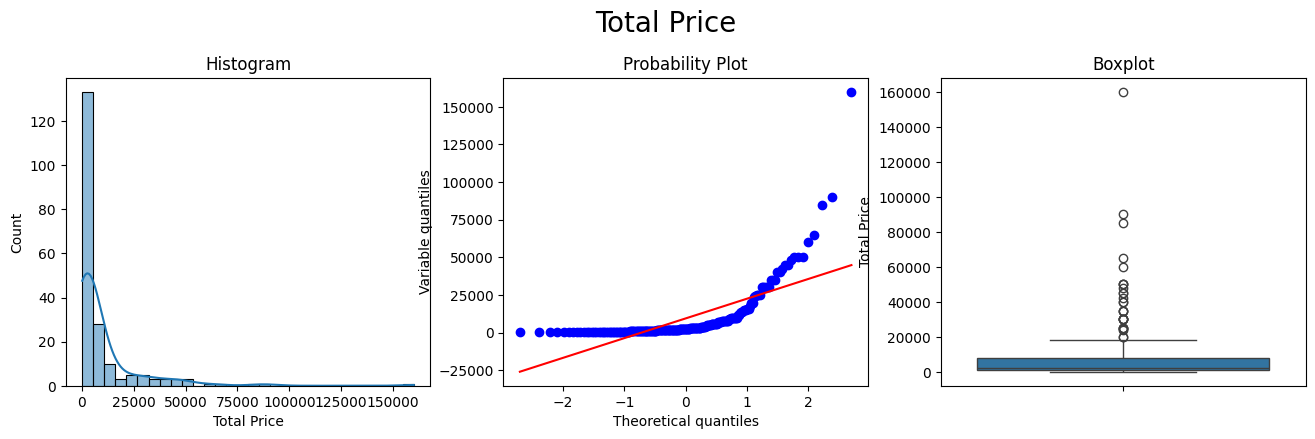

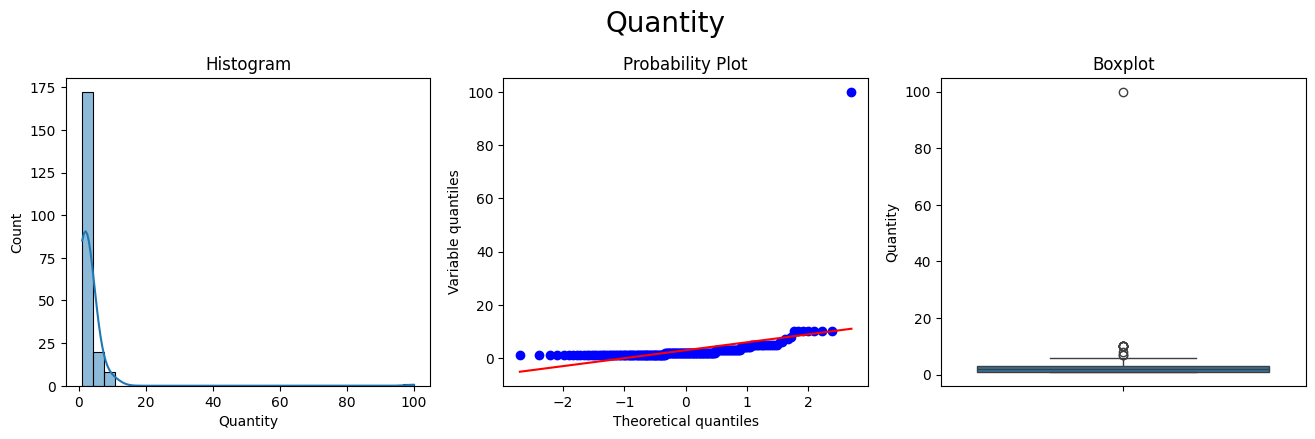

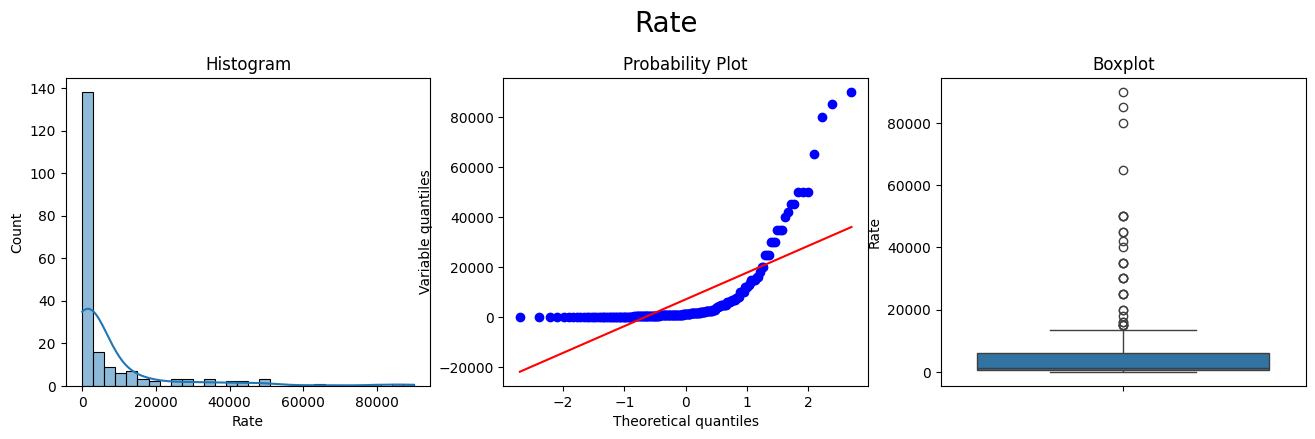

In [22]:
#Looping for numerical columns
for col in rfm_num:
  check_plot(df_rfm,col)
  plt.suptitle(col, fontsize=20, y=1.05)
  plt.show()

**Interpretation**

Overall, the three numerical variables (Rate, Quantity, Total Price) show a non-normal distribution and tend to be right-skewed with the presence of outliers.

These outliers are not data errors, but rather represent high-value customers or premium products.

Therefore, the outlier handling strategy used is not deletion, but rather light winsorizing (5%–95%) to make the distribution more balanced without losing important information.

In [23]:
# Handing Outlier using light winsorizing
for col in ['Total Price', 'Quantity', 'Rate']:
    q1, q99 = df_rfm[col].quantile([0.05, 0.95])
    df_rfm[col] = np.clip(df_rfm[col], q1, q99)

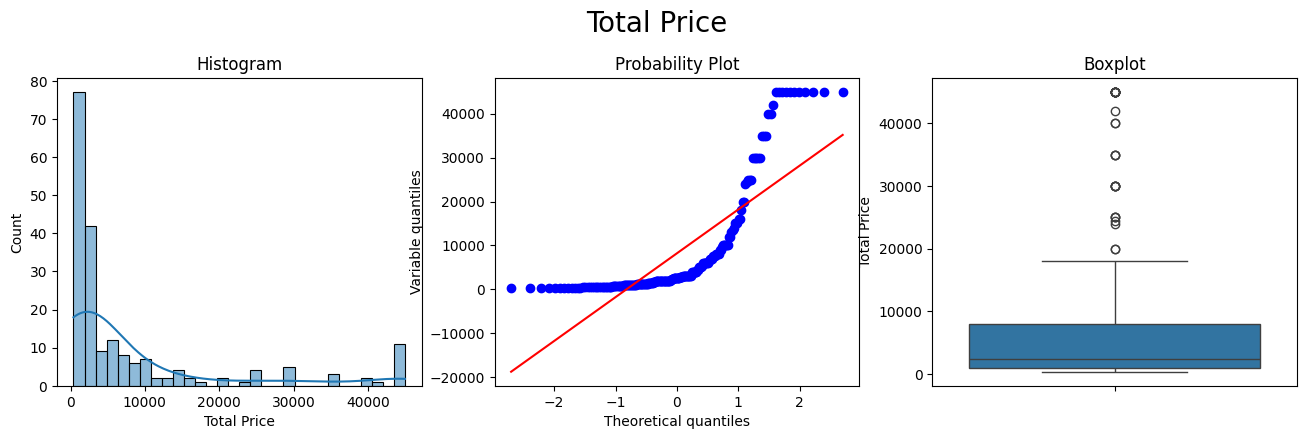

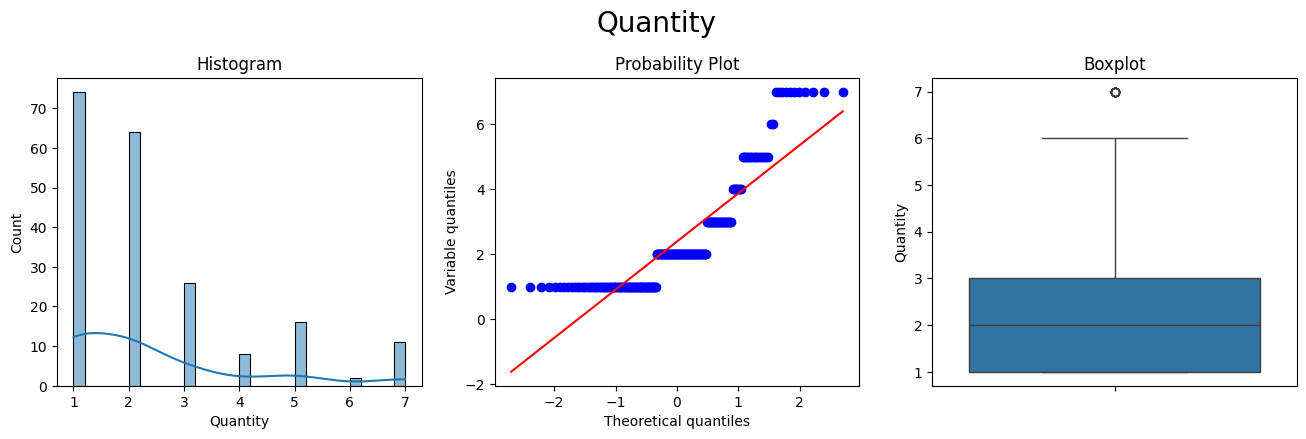

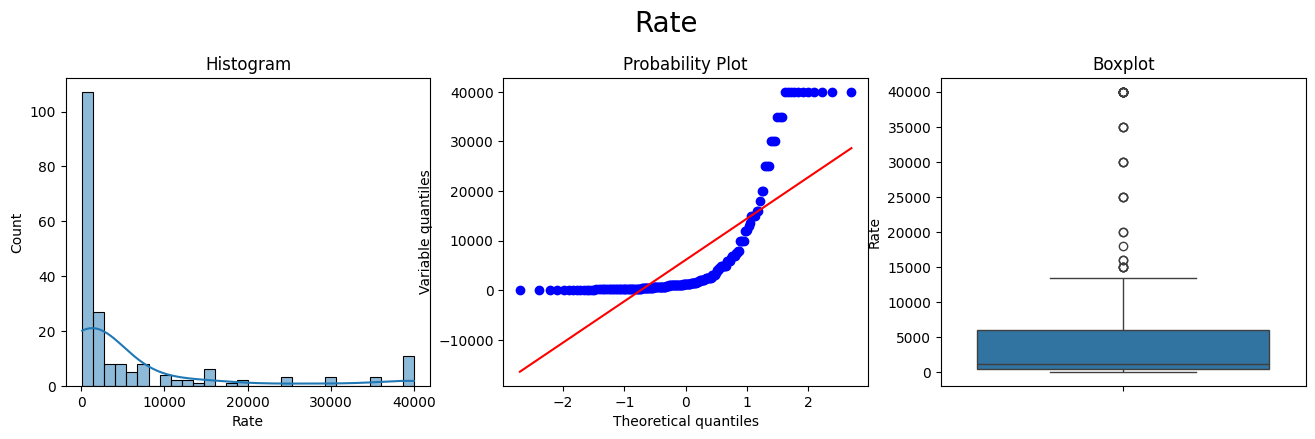

In [24]:
#Reschecking plot after outlier handling
for col in rfm_num:
  check_plot(df_rfm,col)
  plt.suptitle(col, fontsize=20, y=1.05)
  plt.show()

**Interpretation**

After applying light Winsorizing (5th–95th percentile) to the numerical columns — Rate, Quantity, and Total Price — the overall data distribution became more stable and representative of general customer purchasing behavior. The extreme values that previously caused strong right skewness were reduced, resulting in a more balanced and interpretable distribution. Transaction patterns are now easier to analyze, as the spread across customers appears more consistent without extreme spikes that could bias the RFM segmentation. The monetary values also appear more realistic, with high-value transactions remaining visible but within a reasonable range for premium customers. Since Winsorizing caps outliers instead of removing them, the process preserves the meaningful contribution of high-spending customers while maintaining data integrity for accurate business insights.

# Funnel Analysis

## Count uniq user for each action

In [25]:
df_funnel.head()

,User_id,Action
0,52243841613,first_app_open
1,52243841613,search
2,57314161118,search
3,57314161118,product_view
4,57314161118,read_reviews


In [26]:
df_funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_id  2090 non-null   object
 1   Action   2090 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [27]:
#Count uniq user for each action
funnel_counts = df_funnel.groupby('Action')['User_id'].nunique().reset_index()
funnel_counts = funnel_counts.rename(columns={'User_id': 'unique_users'})
print(funnel_counts)

                 Action  unique_users
0            add_review            67
1           add_to_cart           240
2        add_to_wishist             3
3       add_to_wishlist            23
4              checkout           170
5   click_wishlist_page           191
6        first_app_open           115
7        product_review            19
8          product_view           219
9              purchase           167
10          read_review             1
11         read_reviews           269
12               search           212


In [28]:
# Since read_reviews and read_review (as well as add_to_wishlist and add_to_wishlist) have the same meaning,
#we can combine them into one action category so that the funnel analysis is neater and more accurate.
df_funnel['Action'] = df_funnel['Action'].replace({
    'read_review': 'read_reviews',
    'add_to_wishist': 'add_to_wishlist'
})

# Checking after combine
df_funnel['Action'].value_counts()

,count
Action,
read_reviews,343
search,320
product_view,292
add_to_cart,280
checkout,202
click_wishlist_page,202
purchase,201
first_app_open,121
add_review,69


In [29]:
#Save dataset for dashboarding
df_funnel.to_excel('funnel.xlsx', index=False)

### Ordered Action

In [30]:
action_order = [
    'first_app_open',        # user membuka aplikasi (entry point)
    'search',                # user mencari produk
    'product_view',          # user melihat produk
    'read_reviews',          # user membaca ulasan produk
    'click_wishlist_page',   # user membuka halaman wishlist
    'add_to_wishlist',       # user menambahkan produk ke wishlist
    'add_to_cart',           # user memasukkan produk ke keranjang
    'checkout',              # user memproses pembayaran
    'purchase',              # user menyelesaikan pembelian
    'add_review',            # user memberi ulasan
    'product_review'         # user menulis review produk (post-purchase)
]

In [31]:
df_funnel['Action'] = pd.Categorical(df_funnel['Action'], categories=action_order, ordered=True)
df_funnel = df_funnel.sort_values('Action')
df_funnel

,User_id,Action
0,52243841613,first_app_open
146,52134813570,first_app_open
1615,58481913506,first_app_open
149,51559049343,first_app_open
1927,52758304645,first_app_open
...,...,...
280,51624877138,product_review
303,52202209844,product_review
286,51624877138,product_review
308,52270907150,product_review


The data is already sorted based on action_order.

### Recount uniq user

In [32]:
funnel_counts = df_funnel.groupby('Action')['User_id'].nunique().reset_index()
funnel_counts.rename(columns={'User_id': 'unique_users'}, inplace=True)
funnel_counts

/tmp/ipython-input-2193115269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funnel_counts = df_funnel.groupby('Action')['User_id'].nunique().reset_index()


,Action,unique_users
0,first_app_open,115
1,search,212
2,product_view,219
3,read_reviews,270
4,click_wishlist_page,191
5,add_to_wishlist,26
6,add_to_cart,240
7,checkout,170
8,purchase,167
9,add_review,67


In [33]:
funnel_counts = pd.DataFrame(funnel_counts)
funnel_counts.to_excel('funnel_counts.xlsx', index=False)

In [34]:
funnel_counts

,Action,unique_users
0,first_app_open,115
1,search,212
2,product_view,219
3,read_reviews,270
4,click_wishlist_page,191
5,add_to_wishlist,26
6,add_to_cart,240
7,checkout,170
8,purchase,167
9,add_review,67


### Count the Convertion Rate

In [35]:
funnel_df_full = pd.DataFrame(funnel_counts, columns=['Action', 'unique_users'])
funnel_df_full

,Action,unique_users
0,first_app_open,115
1,search,212
2,product_view,219
3,read_reviews,270
4,click_wishlist_page,191
5,add_to_wishlist,26
6,add_to_cart,240
7,checkout,170
8,purchase,167
9,add_review,67


In [36]:
funnel_df_full['conversion_rate'] = (
    funnel_df_full['unique_users'] / funnel_df_full['unique_users'].iloc[0]
).round(2)
funnel_df_full

,Action,unique_users,conversion_rate
0,first_app_open,115,1.00
1,search,212,1.84
2,product_view,219,1.90
3,read_reviews,270,2.35
4,click_wishlist_page,191,1.66
5,add_to_wishlist,26,0.23
6,add_to_cart,240,2.09
7,checkout,170,1.48
8,purchase,167,1.45
9,add_review,67,0.58


### Make Funnel Plot

In [37]:
#Funnel plot by total user
fig_user = px.funnel(funnel_df_full, x='unique_users', y='Action', title='User Funnel')
fig_user.show()

**Interpretation**

The first visualization shows the actual distribution of all user actions. However, because events do not follow the order of the user journey, the graph is not suitable for use as a funnel and does not provide accurate conversion insights. Therefore, the actual funnel needs to focus only on core actions (first_app_open → product_view → add_to_cart → checkout → purchase) that represent the user journey from start to purchase.

In [38]:
#Funnel plot by Conversion Rate
fig_conv = px.funnel(funnel_df_full, x='conversion_rate', y='Action', title='Conversion Rate Funnel')
fig_conv.show()

**Interpretation**

The chart above shows the Conversion Rate Funnel using all real user actions. However, the resulting conversion rates do not represent a valid funnel, because:

1. The actions do not follow a true sequential funnel flow
For example, the conversion rate for read_reviews is higher than first_app_open, which is logically impossible in a real customer journey.

2. Users can perform certain actions without completing prior steps
Many users go straight to add_to_cart without search or product_view, causing conversion rates to fluctuate randomly.

3. Conversion rates do not decrease step-by-step as a true funnel should
Instead, the values go up and down because these events are not designed as sequential funnel stages.

**Conclusion**:
A funnel built from raw user actions only reflects activity distribution, not true conversion flow.
To get meaningful insights, the funnel must be constructed using core funnel steps only
(first_app_open → product_view → add_to_cart → checkout → purchase).


**User actions that do not fall within the core funnel will be used as additional insights to analyze customer behavior.**

## Core Funnel

In [39]:
# Define core Funnel
funnel_steps = ['first_app_open', 'product_view', 'add_to_cart', 'checkout', 'purchase']
funnel_counts = []

#Take all users who enter the first step
current_users = set(df_funnel.loc[df_funnel['Action']=='first_app_open', 'User_id'])

funnel_counts.append(('first_app_open', len(current_users)))

#Loop to calculate the next step
for step in funnel_steps[1:]:
    users_in_step = set(df_funnel.loc[df_funnel['Action']==step, 'User_id'])
    # only count users who passed previous step
    current_users = current_users.intersection(users_in_step)
    funnel_counts.append((step, len(current_users)))

funnel_df = pd.DataFrame(funnel_counts, columns=['Action','unique_users'])
funnel_df


,Action,unique_users
0,first_app_open,115
1,product_view,77
2,add_to_cart,37
3,checkout,23
4,purchase,23


In [40]:
#Calculate the conversion rate
funnel_df['conversion_rate'] = (
    funnel_df['unique_users'] / funnel_df['unique_users'].iloc[0]
).round(2)
funnel_df

,Action,unique_users,conversion_rate
0,first_app_open,115,1.00
1,product_view,77,0.67
2,add_to_cart,37,0.32
3,checkout,23,0.20
4,purchase,23,0.20


In [41]:
#Core Funnel plot
fig_user_core = px.funnel(funnel_df, x='unique_users', y='Action', title='User Funnel')
fig_user_core.show()

In [42]:
# Core Funnel plot by Conversion Rate
fig_conv_core = px.funnel(funnel_df, x='conversion_rate', y='Action', title='Conversion Rate Funnel')
fig_conv_core.show()

**Interpretasi**

The User Funnel shows that out of 115 users who opened the app, only 23 made a purchase. The biggest drop was at the product_view → add_to_cart stage. Meanwhile, the Conversion Rate Funnel confirmed that only 32% of users who viewed products added items to their carts, and only 20% proceeded to checkout/purchase. There were no issues at the payment stage, as 100% of users who checked out completed their transactions. The main bottlenecks were at the product exploration and add_to_cart decision stages.

In [43]:
funnel_df.to_excel('funnel_core.xlsx', index=False)

### Additional Insight to Analyze Customer Behavior

#### 1. Behavioral Insights

In [44]:
#Define first user
first_users = funnel_df_full.loc[funnel_df_full['Action']=='first_app_open','unique_users'].iloc[0]

#Behavioral User
#This is the user's exploration behavior before the main conversion process (purchase).
#Since the conversion_rate value is greater than 1, meaning that the number of users in that action is greater than the number of users who opened the app,
#we use the ratio relative to “first_app_open” (115 users) to clarify the percentage of behavior.
behavioural_actions = ['search','product_view','read_reviews','click_wishlist_page']
df_behaviour = funnel_df_full[funnel_df_full['Action'].isin(behavioural_actions)].copy()

df_behaviour['percent_vs_first_open'] = df_behaviour['unique_users'] / first_users * 100
df_behaviour

,Action,unique_users,conversion_rate,percent_vs_first_open
1,search,212,1.84,184.347826
2,product_view,219,1.90,190.434783
3,read_reviews,270,2.35,234.782609
4,click_wishlist_page,191,1.66,166.086957


In [45]:
df_behaviour.to_excel('behaviour.xlsx', index = False)

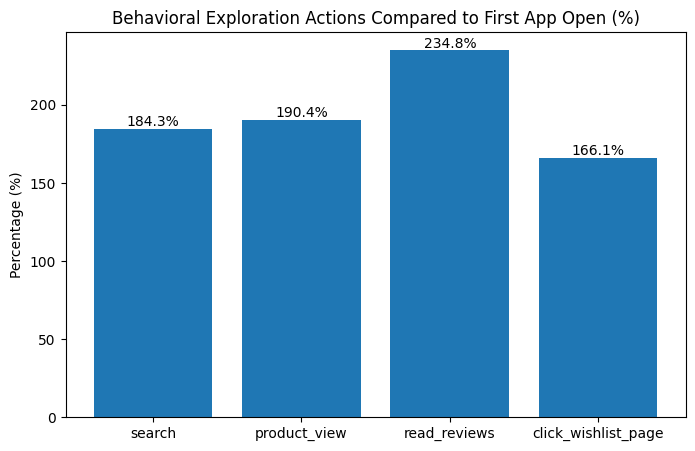

In [46]:
plt.figure(figsize=(8,5))
bars = plt.bar(x=df_behaviour['Action'], height=df_behaviour['percent_vs_first_open'])

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval:.1f}%",
             ha='center', fontsize=10)

plt.title("Behavioral Exploration Actions Compared to First App Open (%)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

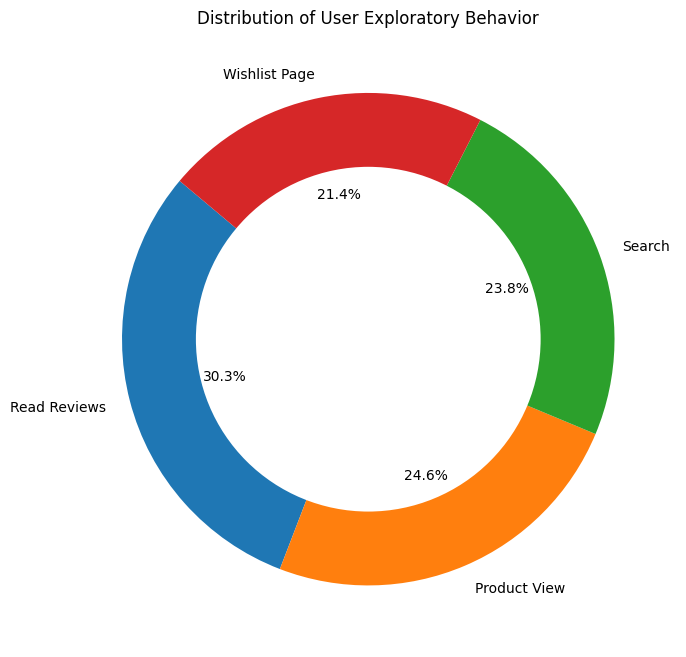

In [47]:
# Data
labels = ['Read Reviews', 'Product View', 'Search', 'Wishlist Page']
values = [270, 219, 212, 191]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Make a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of User Exploratory Behavior")
plt.tight_layout()
plt.show()

**Key Findings**

1. Read Reviews has the highest ratio at 235%, highlighting that users heavily rely on reviews before making a decision.

2. Product viewing (190%) and search activity (184%) also exceed the number of first app opens.This suggests that many users enter the app through deep links, notifications, ads, or external pages rather than through the standard app entry point.

3. Wishlist interactions remain significant (166%).This reflects strong user consideration behavior prior to purchasing.

#### 2. Secondary Conversion

In [48]:
#Define secondary
purchase_users = funnel_df_full.loc[funnel_df_full['Action']=='purchase','unique_users'].iloc[0]
product_view_users = funnel_df_full.loc[funnel_df_full['Action']=='product_view','unique_users'].iloc[0]

secondary_actions = ['add_to_wishlist','add_review','product_review']
df_secondary = funnel_df_full[funnel_df_full['Action'].isin(secondary_actions)].copy()

df_secondary['percent_vs_product_view'] = df_secondary['unique_users'] / product_view_users * 100
df_secondary['percent_vs_purchase'] = df_secondary['unique_users'] / purchase_users * 100
df_secondary


,Action,unique_users,conversion_rate,percent_vs_product_view,percent_vs_purchase
5,add_to_wishlist,26,0.23,11.872146,15.568862
9,add_review,67,0.58,30.593607,40.119760
10,product_review,19,0.17,8.675799,11.377246


In [49]:
df_secondary.to_excel('Secondary.xlsx', index=False)

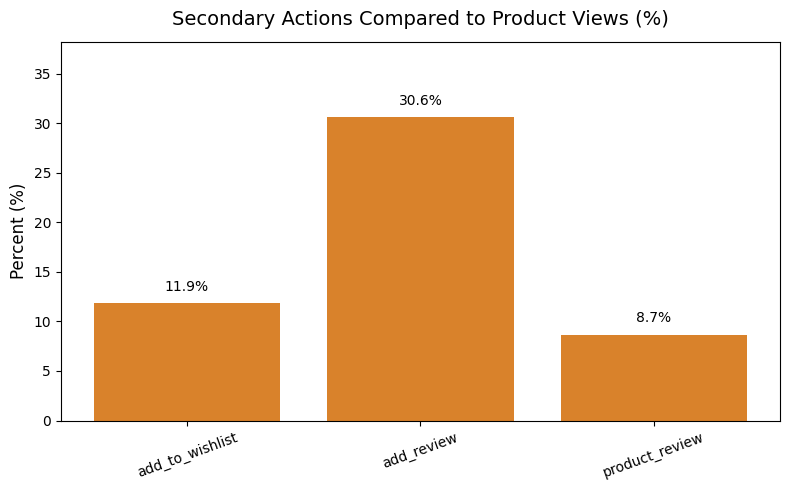

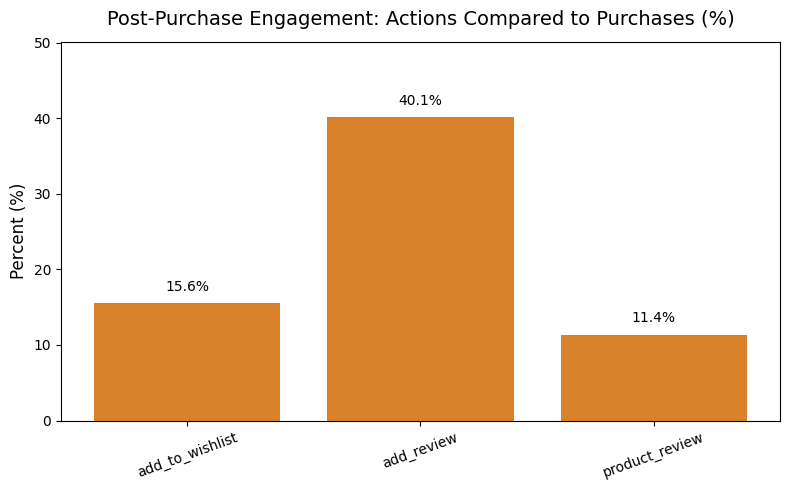

In [50]:
# Styling
bar_color = '#d9822b'  # warna oranye / kontras

# Percent vs Product View
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(df_secondary['Action'], df_secondary['percent_vs_product_view'], color=bar_color)
ax.set_title('Secondary Actions Compared to Product Views (%)', fontsize=14, pad=12)
ax.set_ylabel('Percent (%)', fontsize=12)
ax.set_ylim(0, max(df_secondary['percent_vs_product_view'])*1.25)

# annotate values on bars
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + (max(df_secondary['percent_vs_product_view'])*0.03),
            f"{h:.1f}%", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Percent vs Purchase
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(df_secondary['Action'], df_secondary['percent_vs_purchase'], color=bar_color)
ax.set_title('Post-Purchase Engagement: Actions Compared to Purchases (%)', fontsize=14, pad=12)
ax.set_ylabel('Percent (%)', fontsize=12)
ax.set_ylim(0, max(df_secondary['percent_vs_purchase'])*1.25)

# annotate values on bars
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + (max(df_secondary['percent_vs_purchase'])*0.03),
            f"{h:.1f}%", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


**Interpretation**


* User-generated content is very powerful. Add Review has the highest conversion rate (30–40%), indicating that many active users contribute after purchase.

* Wishlist is low but significant. Add to Wishlist is only 12–15%, but it remains important as an early interest signal for remarketing.

* Product Review is the lowest. Only 9–11%, indicating few users write detailed reviews — an opportunity to encourage quality content through incentives.

# RFM Analysis

### Define Recency, Frequency, and Monetary

In [51]:
# Add one day for recency
reference_date = df_rfm['DateTime'].max() + dt.timedelta(days=1)

# Defining the recency, frequency, and monetary
rfm = df_rfm.groupby('User_id').agg({
    'DateTime': lambda x: (reference_date - x.max()).days,
    'User_id': 'count',
    'Total Price': 'sum'
}).rename(columns={
    'DateTime': 'Recency',
    'User_id': 'Frequency',
    'Total Price': 'Monetary'
}).reset_index()


In [52]:
#Checking the rfm
rfm

,User_id,Recency,Frequency,Monetary
0,51448162784,10,2,21500.0
1,51455512201,64,1,10000.0
2,51462598385,7,2,800.0
3,51463622150,40,2,950.0
4,51465529647,10,2,15500.0
...,...,...,...,...
162,60029406377,164,1,3000.0
163,60034334067,41,1,35000.0
164,60089394505,41,1,13000.0
165,60238282834,11,3,3700.0


In [53]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_id    167 non-null    object 
 1   Recency    167 non-null    int64  
 2   Frequency  167 non-null    int64  
 3   Monetary   167 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.3+ KB


In [54]:
rfm.describe()

,Recency,Frequency,Monetary
count,167.000000,167.000000,167.000000
mean,112.263473,1.203593,9871.437126
std,91.085568,0.432685,14030.891103
min,1.000000,1.000000,400.000000
25%,41.500000,1.000000,1575.000000
50%,72.000000,1.000000,3000.000000
75%,164.000000,1.000000,10700.000000
max,345.000000,3.000000,71000.000000


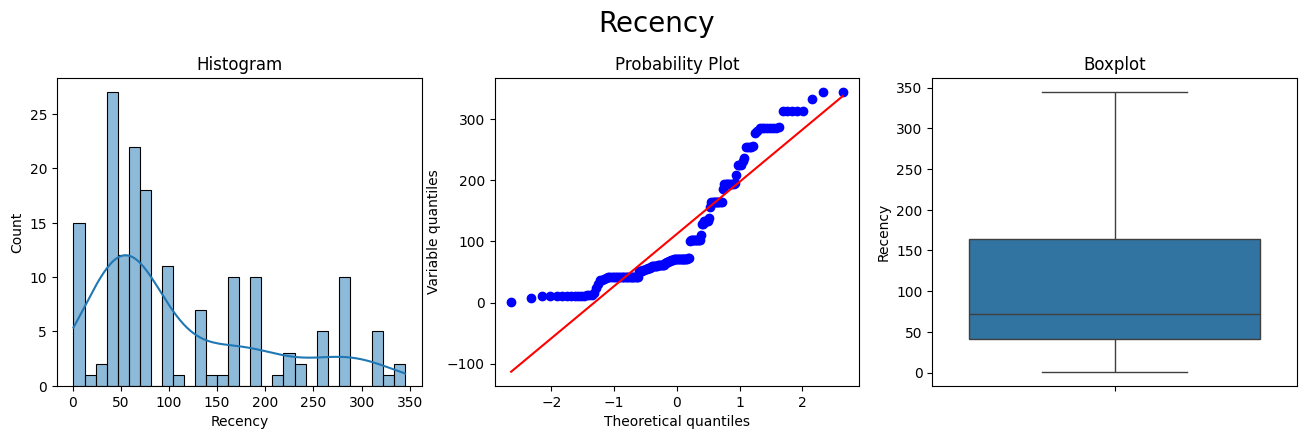

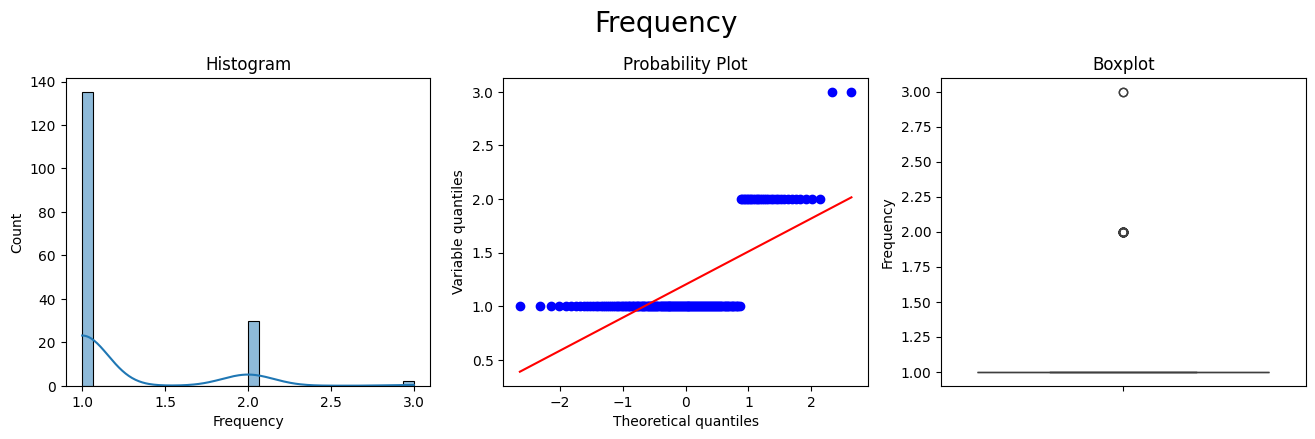

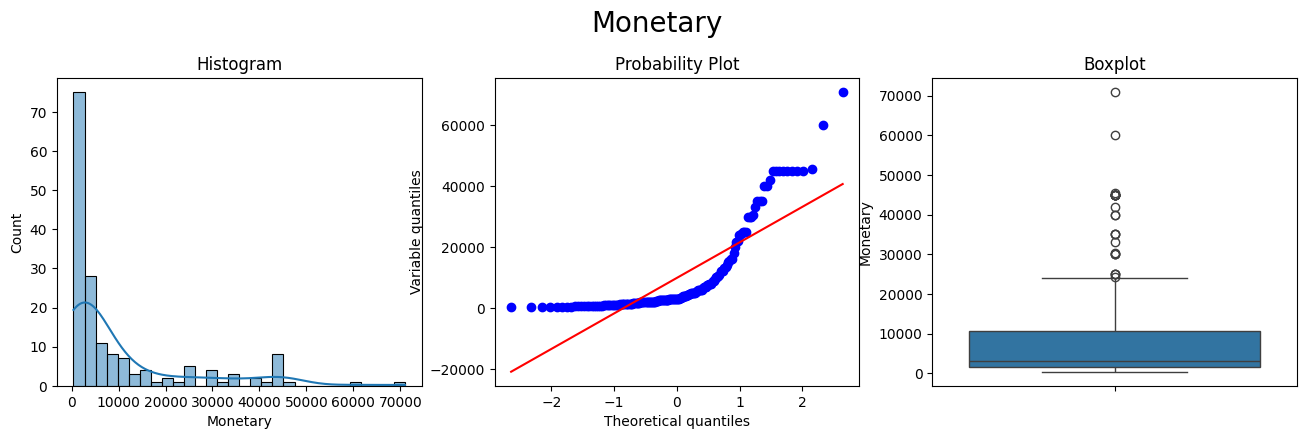

In [55]:
#Rechecking outlier for Recency, Frequency, an Monetary Column
for col in rfm.select_dtypes(include=['float64', 'int64']):
  check_plot(rfm,col)
  plt.suptitle(col, fontsize=20, y=1.05)
  plt.show()

**Interpretation**

*   Recency : There is no outlier in Recency
*   Frequency : The boxplot graph shows that the box is not clearly visible and there are outliers. However, the outliers in the frequency column still make sense because the frequency values are only in the range of 1-3.
* Monetary :  The graph shows the presence of outliers. However, the outliers in the monetary column still make sense because high monetary amounts indicate that many customers spent their money on the company.



### Scoring RFM

In [56]:
#Define score for each RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int) # Recency is reversed because the smaller the value, the better.
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

In [57]:
#Show scoring result
rfm

,User_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,51448162784,10,2,21500.0,5,5,5
1,51455512201,64,1,10000.0,3,1,4
2,51462598385,7,2,800.0,5,5,1
3,51463622150,40,2,950.0,5,5,1
4,51465529647,10,2,15500.0,5,5,5
...,...,...,...,...,...,...,...
162,60029406377,164,1,3000.0,2,4,3
163,60034334067,41,1,35000.0,5,5,5
164,60089394505,41,1,13000.0,5,5,4
165,60238282834,11,3,3700.0,5,5,3


### Creat Segmentation Based on RFM Scoring

In [58]:
# Convert each score to string and concatenate
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

In [59]:
# Define segmentation logic
def segment(rfm_code):
    r = int(rfm_code[0])
    f = int(rfm_code[1])
    m = int(rfm_code[2])

    # 1. Champions: best in all dimensions
    if r == 5 and f >= 4 and m >= 4:
        return "Champion"

    # 2. Loyal Customers: high Frequency + Monetary
    if r >= 4 and f >= 4:
        return "Loyal Customer"

    # 3. Potential Loyalist: good Recency + moderate F/M
    if r >= 4 and f >= 3:
        return "Potential Loyalist"

    # 4. Recent Customers: new/recent buyers, moderate spending
    if r == 5:
        return "Recent Customer"

    # 5. Promising: decent F/M but recency not high yet
    if r >= 3 and f >= 2:
        return "Promising"

    # 6. Needs Attention: engagement mulai turun
    if r >= 2 and f >= 1:
        return "Needs Attention"

    # 7. At Risk: low recency (lama tidak beli)
    return "At Risk"


# Apply to dataframe
rfm['Segment'] = rfm['RFM_Score'].apply(segment)


In [60]:
rfm

,User_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,51448162784,10,2,21500.0,5,5,5,555,Champion
1,51455512201,64,1,10000.0,3,1,4,314,Needs Attention
2,51462598385,7,2,800.0,5,5,1,551,Loyal Customer
3,51463622150,40,2,950.0,5,5,1,551,Loyal Customer
4,51465529647,10,2,15500.0,5,5,5,555,Champion
...,...,...,...,...,...,...,...,...,...
162,60029406377,164,1,3000.0,2,4,3,243,Needs Attention
163,60034334067,41,1,35000.0,5,5,5,555,Champion
164,60089394505,41,1,13000.0,5,5,4,554,Champion
165,60238282834,11,3,3700.0,5,5,3,553,Loyal Customer


In [61]:
#Calculate quantiles to see cut off
quantiles = {
    'Recency': rfm['Recency'].quantile([0.2, 0.4, 0.6, 0.8]),
    'Frequency': rfm['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]),
    'Monetary': rfm['Monetary'].quantile([0.2, 0.4, 0.6, 0.8])
}

# Show cutoff
for key, value in quantiles.items():
    print(f"\n{key} Cutoff:")
    print(value)


Recency Cutoff:
0.2     41.0
0.4     62.0
0.6    102.0
0.8    194.0
Name: Recency, dtype: float64

Frequency Cutoff:
0.2    1.0
0.4    1.0
0.6    1.0
0.8    1.0
Name: Frequency, dtype: float64

Monetary Cutoff:
0.2     1210.0
0.4     2500.0
0.6     5000.0
0.8    15400.0
Name: Monetary, dtype: float64


In [62]:
rfm['Segment'].value_counts()

,count
Segment,
Promising,45
Needs Attention,41
At Risk,30
Loyal Customer,25
Champion,11
Potential Loyalist,10
Recent Customer,5


In [63]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_id    167 non-null    object 
 1   Recency    167 non-null    int64  
 2   Frequency  167 non-null    int64  
 3   Monetary   167 non-null    float64
 4   R_Score    167 non-null    int64  
 5   F_Score    167 non-null    int64  
 6   M_Score    167 non-null    int64  
 7   RFM_Score  167 non-null    object 
 8   Segment    167 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 11.9+ KB


In [64]:
# Merging the rfm with its RFM scores and segment labels into the original df_rfm
df_full = df_rfm.merge(rfm, on='User_id', how='left')

In [65]:
df_full

,User_id,DateTime,Total Price,Quantity,Rate,Category,SubCategory,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,51629142904,2019-09-03 18:10:00,1500.0,5.0,300.0,Cleaning supplies,Cleaning sprays,110,2,5500.0,2,5,4,254,Needs Attention
1,51629142904,2019-01-10 21:08:00,4000.0,2.0,2000.0,Mobile & Accessories,Charging wire,110,2,5500.0,2,5,4,254,Needs Attention
2,51940324591,2019-04-08 19:09:00,500.0,5.0,100.0,Mobile & Accessories,Cases,12,2,2500.0,5,5,2,552,Loyal Customer
3,51965507652,2019-12-10 19:25:00,4000.0,4.0,1000.0,Digital Devices,Headphones,12,1,4000.0,5,2,3,523,Recent Customer
4,51940324591,2019-12-10 13:07:00,2000.0,2.0,1000.0,Fitness,Dumbells,12,2,2500.0,5,5,2,552,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,52205716885,2019-08-05 13:38:00,400.0,2.0,200.0,Accessories,Bracelets,139,1,400.0,2,2,1,221,Needs Attention
197,51768712908,2019-01-23 21:10:00,2800.0,4.0,700.0,Kid's fashion,kids jeans,333,1,2800.0,1,1,3,113,At Risk
198,52056666335,2019-05-04 21:12:00,14000.0,2.0,7000.0,Footwear,Shoes,232,1,14000.0,1,2,4,124,At Risk
199,51883832383,2019-05-28 18:40:00,30000.0,1.0,30000.0,Fitness,Treadmill,208,1,30000.0,1,1,5,115,At Risk


In [66]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      201 non-null    object        
 1   DateTime     201 non-null    datetime64[ns]
 2   Total Price  201 non-null    float64       
 3   Quantity     201 non-null    float64       
 4   Rate         201 non-null    float64       
 5   Category     201 non-null    object        
 6   SubCategory  201 non-null    object        
 7   Recency      201 non-null    int64         
 8   Frequency    201 non-null    int64         
 9   Monetary     201 non-null    float64       
 10  R_Score      201 non-null    int64         
 11  F_Score      201 non-null    int64         
 12  M_Score      201 non-null    int64         
 13  RFM_Score    201 non-null    object        
 14  Segment      201 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
mem

In [67]:
df_full.groupby('Segment')['User_id'].nunique().sort_values()

,User_id
Segment,
Recent Customer,5
Potential Loyalist,10
Champion,11
Loyal Customer,25
At Risk,30
Needs Attention,41
Promising,45


## Saving Preprocessed Data for Dashboard

In [68]:
# aggregated data
rfm.to_csv('rfm.csv', index=False)

In [69]:
# original data
df_full.to_csv('cleaned_data.csv', index=False)

In [70]:
# original data
df_full.to_excel('cleaned_data.xlsx', index=False)

## Exploratory Data Analysis (EDA)

### 1. Distribution of RFM Metrics

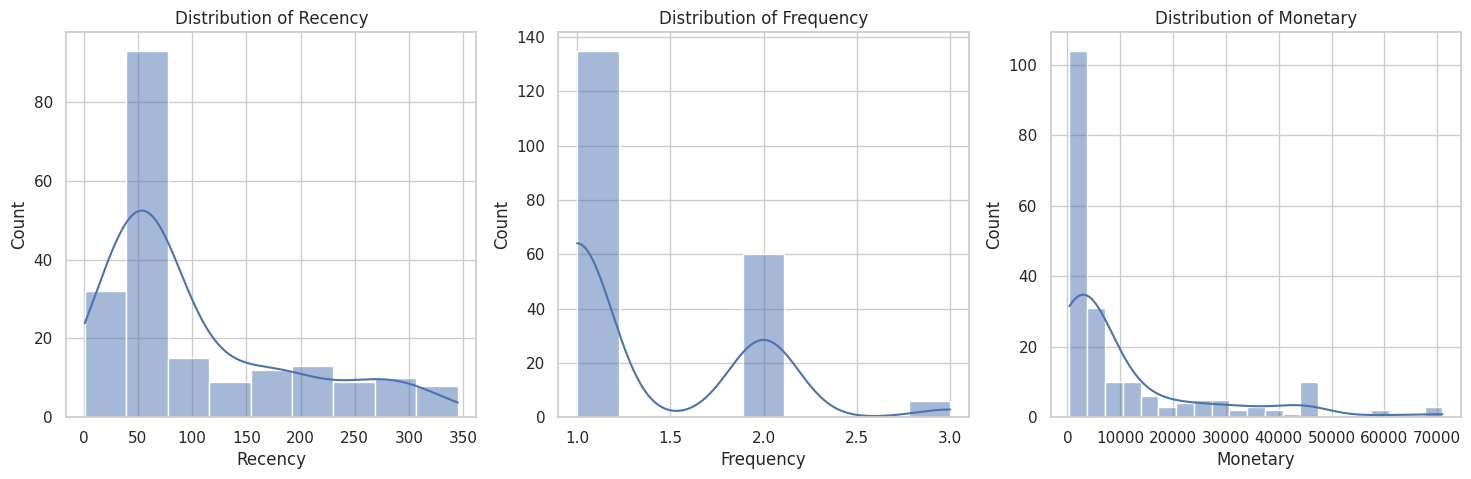

In [71]:
# Set style
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_full['Recency'], kde=True, ax=ax[0])
ax[0].set_title("Distribution of Recency")

sns.histplot(df_full['Frequency'], kde=True, ax=ax[1])
ax[1].set_title("Distribution of Frequency")

sns.histplot(df_full['Monetary'], kde=True, ax=ax[2])
ax[2].set_title("Distribution of Monetary")

plt.show()

### 2. Distribution of Segment

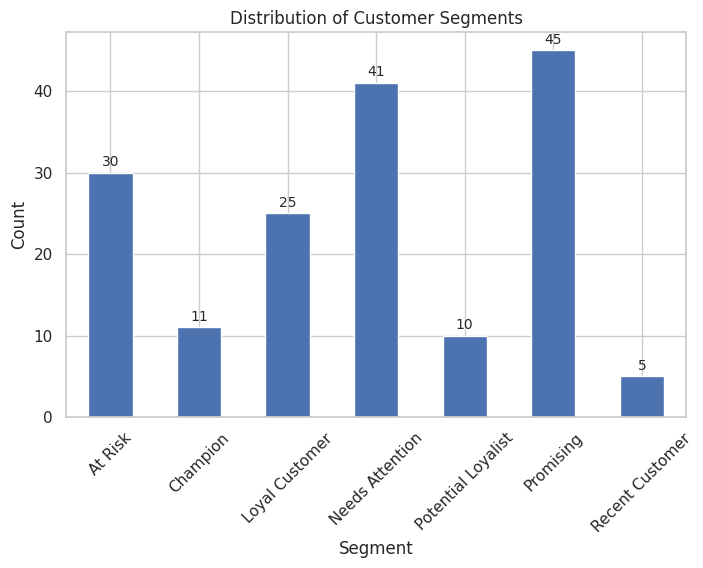

In [72]:
plt.figure(figsize=(8,5))
segment_counts = df_full.groupby('Segment')['User_id'].nunique()

ax = segment_counts.plot(kind='bar')

plt.title("Distribution of Customer Segments")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add Text
for i, value in enumerate(segment_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

**Interpretation**

RFM analysis shows that customers fall into several key segments, with the largest groups being Promising (45 users) and Needs Attention (41 users). This indicates many customers are somewhat engaged but not yet loyal. Loyal Customers (25 users) and Champions (11 users) form the high-value core, while At Risk (30 users) suggests a sizable portion is becoming inactive and needs re-engagement.

In [73]:
#Save for make a chart in presentation
segment_counts.to_excel('segment_counts.xlsx', index=True)

### 3. Distribution of Category and SubCategory

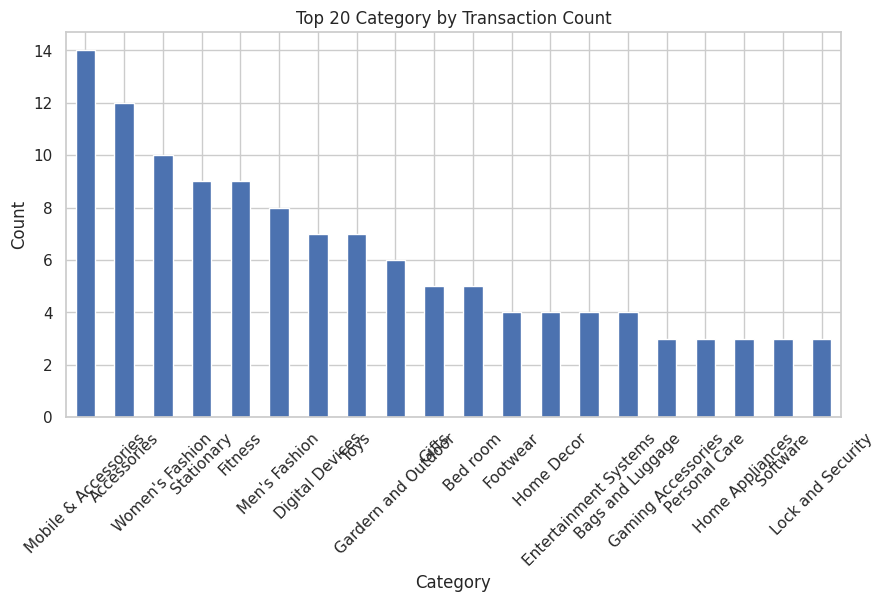

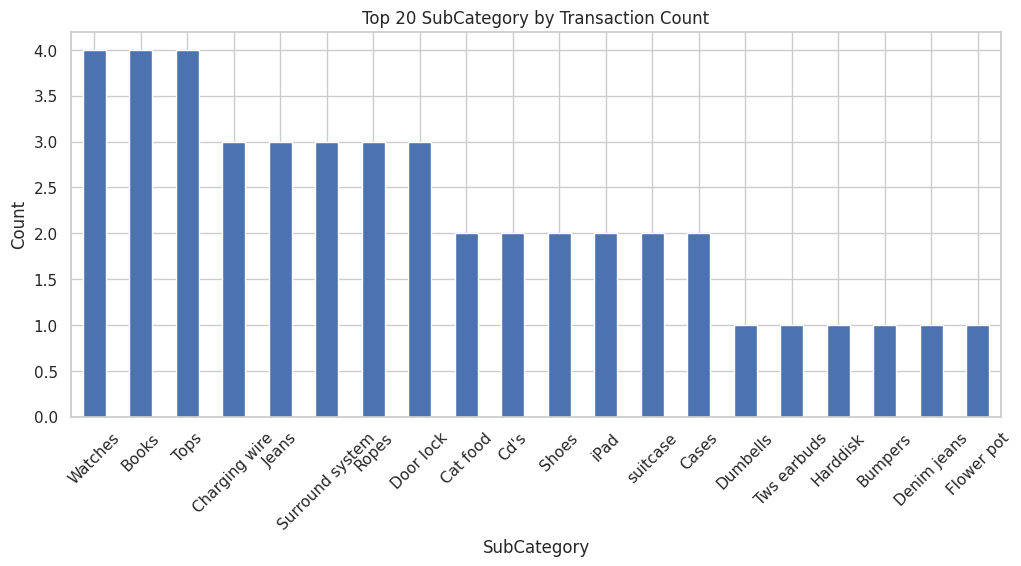

In [74]:
#Distribution of Category
plt.figure(figsize=(10,5))
df_full['Category'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Category by Transaction Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Distribution of SubCategory
plt.figure(figsize=(12,5))
df_full['SubCategory'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 SubCategory by Transaction Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Interpretation**

The 3 best-selling categories (based on sales) are Mobile & Accessories, Accessories, and Women's Fashion.

The 3 best-selling subcategories (based on sales) are watches, books, and tops.

### 4. Distribution of Total Price, Quantity, and Rate

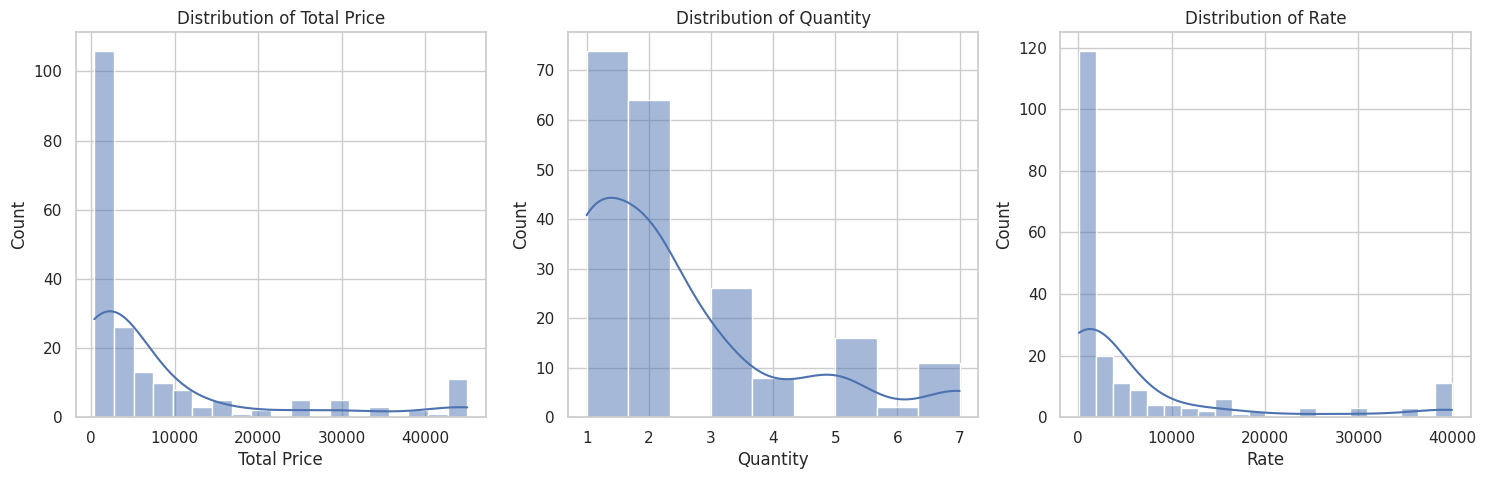

In [75]:
#Make 3 plot in 1 row
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

#Histogram of Total Price
sns.histplot(df_full['Total Price'], kde=True, ax=ax[0])
ax[0].set_title("Distribution of Total Price")

#Histogram of Quantity
sns.histplot(df_full['Quantity'], kde=True, ax=ax[1])
ax[1].set_title("Distribution of Quantity")

#Histogram of Rate
sns.histplot(df_full['Rate'], kde=True, ax=ax[2])
ax[2].set_title("Distribution of Rate")

plt.show()

**Intepretation**

For the distribution of the Quantity, Rate, and Total Price columns, all three show a right-skewed distribution.

### 5. Correlation Matrix

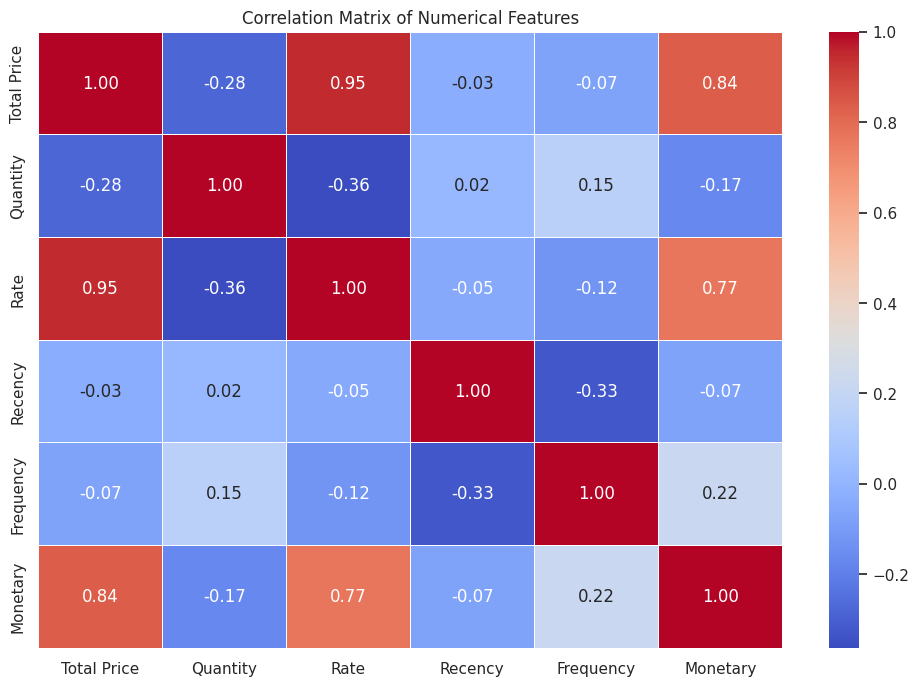

In [76]:
#List of numerical columns
num_col = ['Total Price', 'Quantity','Rate','Recency','Frequency','Monetary']
corr_matrix = df_full[num_col].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [77]:
# Convert correlation matrix to long format (pairwise)
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()  # change to long format
    .reset_index()
)

corr_pairs.columns = ["Variable 1", "Variable 2", "Correlation"]

# Add Rank Column
corr_pairs["Rank"] = corr_pairs["Correlation"].abs().rank(ascending=False)

# Add Strength
def strength(x):
    if abs(x) >= 0.7:
        return "Strong"
    elif abs(x) >= 0.3:
        return "Moderate"
    else:
        return "Weak"

corr_pairs["Strength"] = corr_pairs["Correlation"].apply(strength)

# Get Rank
corr_pairs = corr_pairs.sort_values("Rank")

corr_pairs.head(50)

,Variable 1,Variable 2,Correlation,Rank,Strength
1,Total Price,Rate,0.951681,1.0,Strong
4,Total Price,Monetary,0.837281,2.0,Strong
11,Rate,Monetary,0.770641,3.0,Strong
5,Quantity,Rate,-0.362566,4.0,Moderate
12,Recency,Frequency,-0.326412,5.0,Moderate
0,Total Price,Quantity,-0.279197,6.0,Weak
14,Frequency,Monetary,0.222371,7.0,Weak
8,Quantity,Monetary,-0.170268,8.0,Weak
7,Quantity,Frequency,0.154546,9.0,Weak
10,Rate,Frequency,-0.124789,10.0,Weak


**Intepretation**

1. Strong Positive Correlations

* Total Price & Rate (0.95) → Very strong positive correlation, indicating that higher rates are associated with higher total prices.

* Total Price & Monetary (0.84) → Strong positive relationship, showing that higher monetary values correspond to higher total prices.

* Rate & Monetary (0.77) → Strong positive correlation, suggesting that higher rates contribute significantly to monetary values.

2. Moderate Correlations

* Quantity & Rate (-0.36) → Moderate negative correlation; higher quantities are slightly associated with lower rates.

* Recency & Frequency (-0.33) → Moderate negative correlation; users who purchase more frequently tend to have more recent interactions.

3. Weak Correlations

* Other variable pairs show weak positive or negative correlations (e.g., Total Price & Quantity -0.28, Frequency & Monetary 0.22, Quantity & Monetary -0.17), indicating minimal linear relationships.

* Weak correlations suggest that these variables have limited direct influence on each other and may require additional context or segmentation to interpret meaningfully.

### Top 10 Spender by Segment

In [78]:
df_full.columns

Index(['User_id', 'DateTime', 'Total Price', 'Quantity', 'Rate', 'Category',
       'SubCategory', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score', 'Segment'],
      dtype='object')

In [80]:
# Get some columns needed
df_selected = df_full[['User_id', 'Segment', 'RFM_Score', 'Recency', 'Frequency', 'Monetary']].copy()

# Sum recency, frequency, monetary for each user_id
df_grouped = df_selected.groupby('User_id', as_index=False).agg({
    'Segment': 'first',
    'RFM_Score': 'first',
    'Recency': 'sum',
    'Frequency': 'sum',
    'Monetary': 'sum'
})

# Sort based on sum of monetary
df_sorted = df_grouped.sort_values(by='Monetary', ascending=False)

# Get top 10 Spender
df_top10 = df_sorted.head(10)

df_top10

,User_id,Segment,RFM_Score,Recency,Frequency,Monetary
17,51565158157,Promising,355,216,9,213000.0
13,51526464449,Loyal Customer,455,110,4,120000.0
147,58481913506,Promising,355,144,4,91000.0
54,51945183373,At Risk,155,512,4,66000.0
130,56295462878,Champion,555,82,4,60900.0
24,51626168971,Needs Attention,415,62,1,45000.0
22,51613167885,Needs Attention,415,52,1,45000.0
139,57500609913,Promising,345,102,1,45000.0
93,52787855576,Potential Loyalist,435,42,1,45000.0
127,55817701891,Champion,545,31,1,45000.0


In [81]:
df_top10.to_excel('top10.xlsx', index=True)

## Conclusions

1. Early Funnel Bottleneck

* Major drop-off occurs from Product View → Add to Cart (32%).

* Checkout → Purchase conversion remains perfect (100%).

2. Customer Value Distribution

* Most revenue comes from high-value segments: Promising, At Risk, Champions.

* Many users fall into Needs Attention & At Risk, indicating high churn risk.

3. RFM Segment Observations

* Promising & Needs Attention dominate in number.

* Champions & Loyal Customers remain crucial for long-term revenue stability.

4. Sales Contribution

* Promising customers contribute the most sales → top priority for conversion into Loyal/Champion.

* At Risk customers require reactivation strategies.

5. Recommended Key Strategies

* Improve product pages and reduce friction in Add-to-Cart.

* Strengthen social proof (reviews, testimonials).

* Apply RFM-based marketing to enhance conversion, retention, and customer lifetime value.

## Recommendations

1. Enhance Product Pages

* Improve product visuals and descriptions.

* Highlight key benefits to reduce drop-off from Product View → Add to Cart.

* Display shipping estimates early, enable “Buy Now,” and send cart reminders.

2. Leverage Engagement Features

* Encourage customers to write reviews.

* Use wishlist data for targeted promotions and price-drop alerts.

3. Use RFM Insights for Targeted Marketing

* Promote Promising users into Loyal/Champion via personalized deals.

* Re-engage At Risk & Needs Attention customers with win-back offers.

* Reward Champions & Loyal buyers with exclusive benefits to increase retention.